In [1]:
import pandas as pd
import numpy as np

In [2]:
start_df = pd.read_csv("train_essays.csv")
train_failed_df = pd.read_csv("train_df.csv")
train_used_df = pd.read_csv("train_df2.csv")
after_a = pd.read_csv("train_df_after_A.csv")
after_c = pd.read_csv("train_df_after_C.csv")

In [3]:
start_df

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


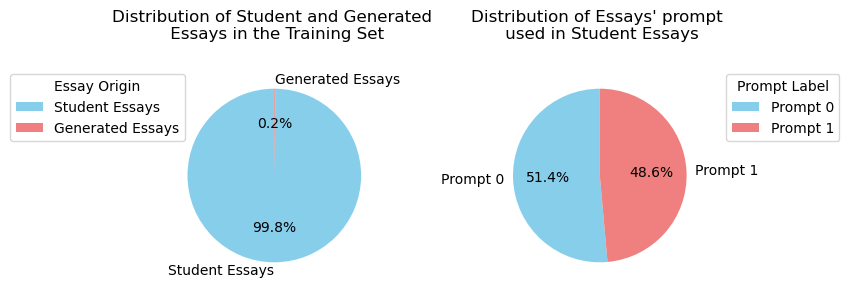

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


column1_counts = start_df['generated'].value_counts()
column2_counts = start_df[start_df['generated']==0]['prompt_id'].value_counts()

# Plot a pie chart for 'column1'
labels1 = ['Student Essays','Generated Essays']
labels2 = ['Prompt 0', 'Prompt 1']
sizes1 = column1_counts.values
sizes2 = column2_counts.values
fig, axs = plt.subplots(1, 2, figsize=(7, 4),gridspec_kw={'wspace': 0.5})
axs[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axs[0].set_title('Distribution of Student and Generated \n Essays in the Training Set',pad=20)
axs[0].legend(labels1, title='Essay Origin',bbox_to_anchor=(-0.75, 1), loc='upper left')

axs[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axs[1].set_title("Distribution of Essays' prompt \n used in Student Essays",pad=20)
axs[1].legend(labels2, title='Prompt Label',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
from gensim.models import FastText
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

texts = [word_tokenize(sentence) for sentence in start_df['text']]
stop_words = set(stopwords.words('english'))
texts_no_stopwords = [[word.lower() for word in sentence if word.lower() not in stop_words] for sentence in texts]
ft_model = FastText(texts_no_stopwords, epochs=2, vector_size=300, window=3, min_count=2, workers=10)
vocab = ft_model.wv.key_to_index
words = np.array([w for w in vocab])
embeddings = np.array([ft_model.wv[w] for w in words])
low_dim = TSNE(n_components=2, init='pca', random_state=42).fit_transform(embeddings)

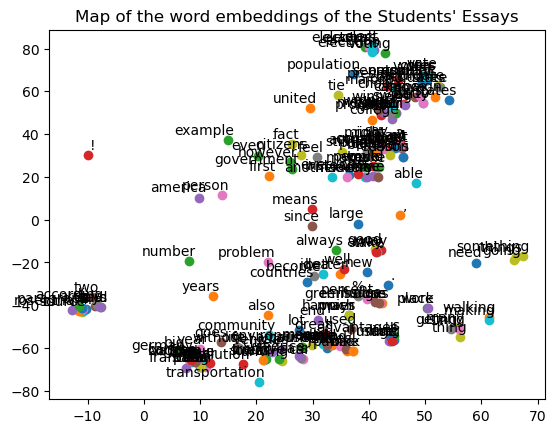

In [39]:
plt.title("Map of the word embeddings of the Students' Essays")
for i in range(200):
    x, y = low_dim[i, 0], low_dim[i, 1] # point in lower-dim space
    ax = plt.scatter(x, y) # draw
    plt.annotate(words[i], 
                 xy=(x, y), 
                 xytext=(5, 2), 
                 textcoords='offset points', 
                 ha='right', 
                 va='bottom')     

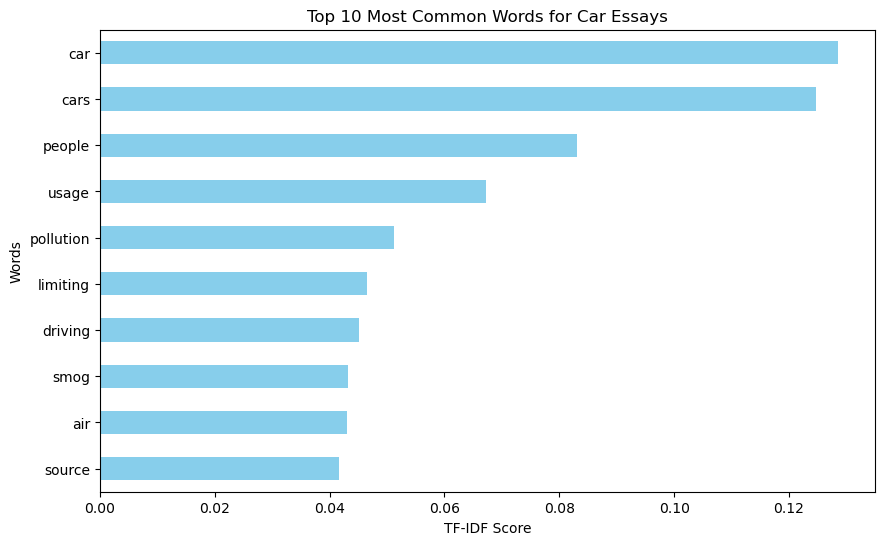

In [77]:
texts = start_df[start_df['prompt_id']==0]['text']
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
most_common_words = tfidf_df.mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
most_common_words.head(10)[::-1].plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Words for Car Essays')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

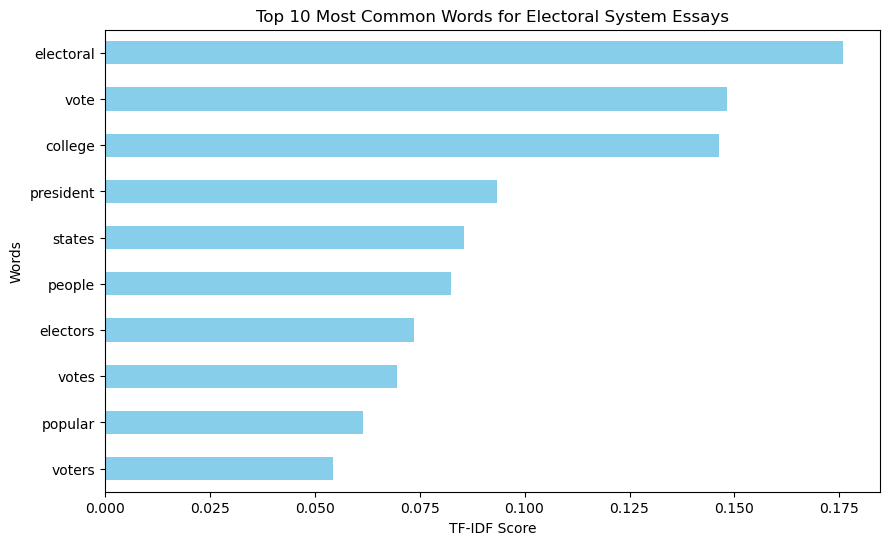

In [76]:
texts = start_df[start_df['prompt_id']==1]['text']
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
most_common_words = tfidf_df.mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
most_common_words.head(10)[::-1].plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Words for Electoral System Essays')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

In [58]:
train_used_df.drop(axis=1,columns=['Unnamed: 0'],inplace=True)
train_used_df

,prompt_id,text,generated
0,0,Cars. Cars have been around since they became ...,0
1,0,Transportation is a large necessity in most co...,0
2,0,Americas love affair with its vehicles seems t...,0
3,0,How often do you ride in a car Do you drive a ...,0
4,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...
2629,1,letter_to_state_senator \n recipient Senator L...,1
2630,0,Limiting car usage offers numerous advantages ...,1
2631,1,letter \n recipient State Senator\n address St...,1
2632,0,Due to the character limit I cannot provide a ...,1


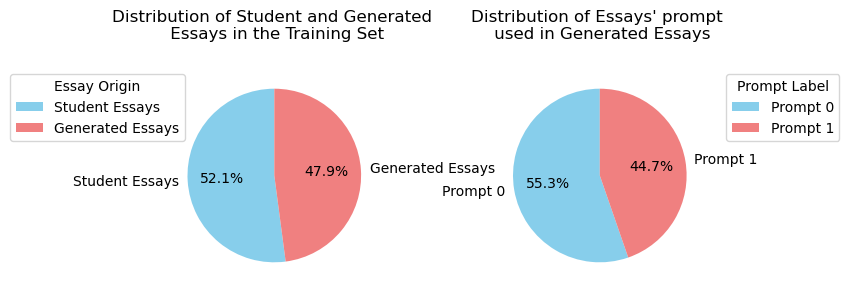

In [60]:
column1_counts = train_used_df['generated'].value_counts()
column2_counts = train_used_df[train_used_df['generated']==1]['prompt_id'].value_counts()

# Plot a pie chart for 'column1'
labels1 = ['Student Essays','Generated Essays']
labels2 = ['Prompt 0', 'Prompt 1']
sizes1 = column1_counts.values
sizes2 = column2_counts.values
fig, axs = plt.subplots(1, 2, figsize=(7, 4),gridspec_kw={'wspace': 0.5})
axs[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axs[0].set_title('Distribution of Student and Generated \n Essays in the Training Set',pad=20)
axs[0].legend(labels1, title='Essay Origin',bbox_to_anchor=(-0.75, 1), loc='upper left')

axs[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axs[1].set_title("Distribution of Essays' prompt \n used in Generated Essays",pad=20)
axs[1].legend(labels2, title='Prompt Label',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [62]:
after_a.drop(axis=1,columns=['Unnamed: 0'],inplace=True)
after_a

,prompt_id,text,generated,max_similarity,avg_similarity,Predictability
0,0,Cars. Cars have been around since they became ...,0,NaN,NaN,NaN
1,0,Transportation is a large necessity in most co...,0,NaN,NaN,NaN
2,0,Americas love affair with its vehicles seems t...,0,NaN,NaN,NaN
3,0,How often do you ride in a car Do you drive a ...,0,NaN,NaN,NaN
4,0,Cars are a wonderful thing. They are perhaps o...,0,NaN,NaN,NaN
...,...,...,...,...,...,...
2629,1,letter_to_state_senator \n recipient Senator L...,1,0.020836,0.090249,1.000000
2630,0,Limiting car usage offers numerous advantages ...,1,0.306796,0.092755,1.000000
2631,1,letter \n recipient State Senator\n address St...,1,0.008905,0.104442,0.999992
2632,0,Due to the character limit I cannot provide a ...,1,0.050336,0.019247,0.999998


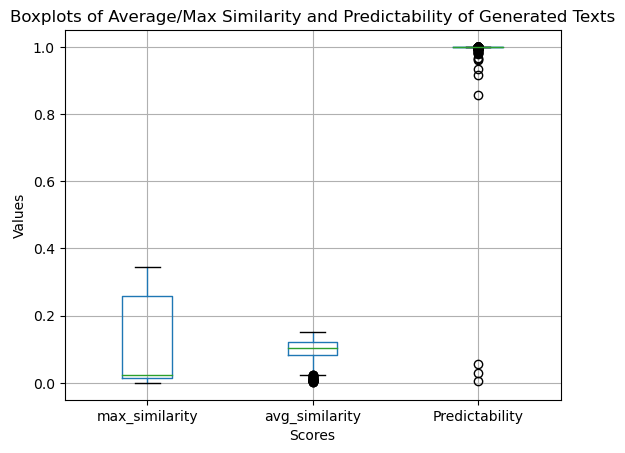

In [63]:
after_a.loc[:,['max_similarity','avg_similarity','Predictability']].boxplot()

# Adding title and labels
plt.title('Boxplots of Average/Max Similarity and Predictability of Generated Texts')
plt.xlabel('Scores')
plt.ylabel('Values')

# Display the plot
plt.show()

(0.8, 1.0)

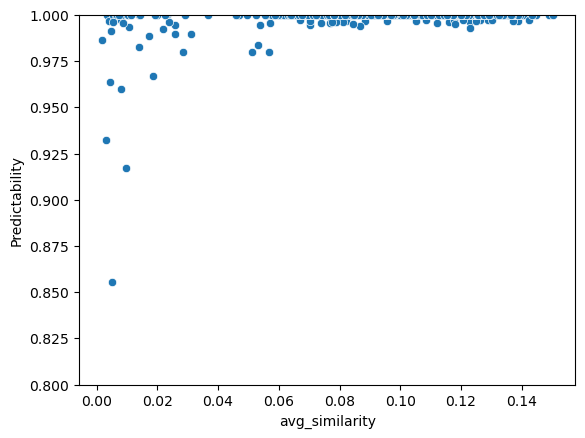

In [64]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.scatterplot(x="avg_similarity", y="Predictability", data=after_a[after_a['generated']==1])
plt.ylim(0.8,1)

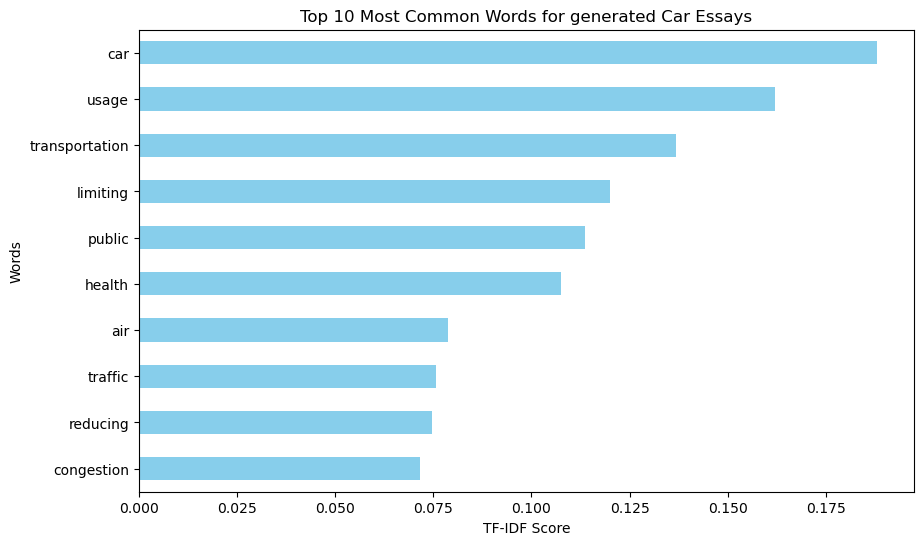

In [75]:
texts = after_a[(after_a['prompt_id']==0)&(after_a['generated']==1)]['text']
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
most_common_words = tfidf_df.mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
most_common_words.head(10)[::-1].plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Words for generated Car Essays')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

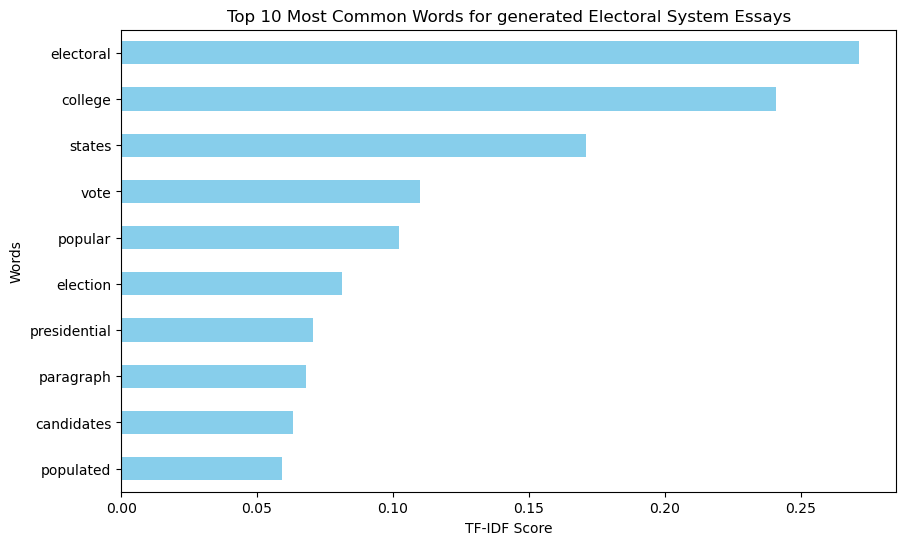

In [74]:
texts = after_a[(after_a['prompt_id']==1)&(after_a['generated']==1)]['text']
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
most_common_words = tfidf_df.mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
most_common_words.head(10)[::-1].plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Words for generated Electoral System Essays')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

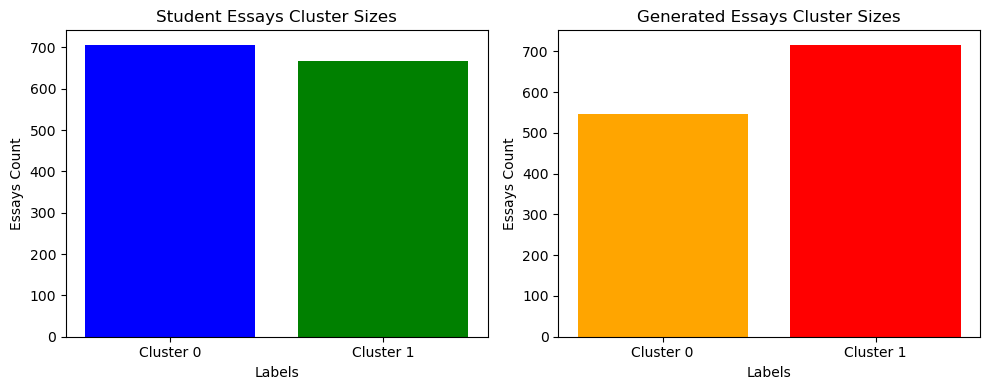

In [79]:
import matplotlib.pyplot as plt

# Sample data for the first bar chart
labels_1 = ['Cluster 0', 'Cluster 1']
values_1 = [706, 666]

# Sample data for the second bar chart
labels_2 = ['Cluster 0', 'Cluster 1']
values_2 = [546, 716]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart 1
ax1.bar(labels_1, values_1, color=['blue', 'green'])
ax1.set_title('Student Essays Cluster Sizes')
ax1.set_xlabel('Labels')
ax1.set_ylabel('Essays Count')

# Bar chart 2
ax2.bar(labels_2, values_2, color=['orange', 'red'])
ax2.set_title('Generated Essays Cluster Sizes')
ax2.set_xlabel('Labels')
ax2.set_ylabel('Essays Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the charts
plt.show()


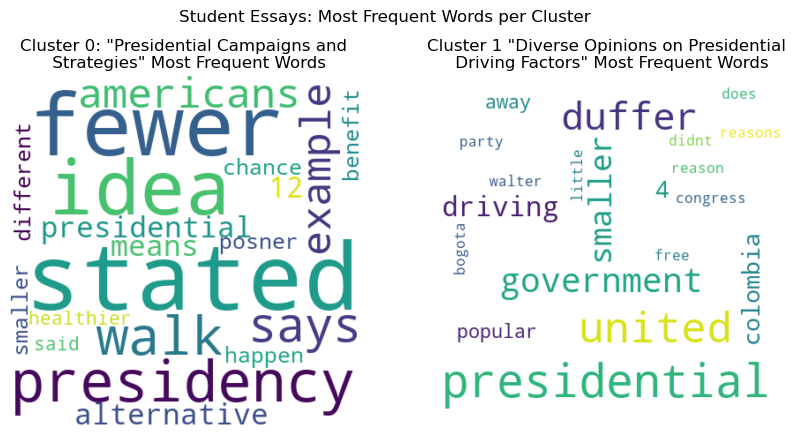

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your word frequency data for the first cloud
word_frequencies_1 = {
    'stated': 12,
    'fewer': 10,
    'idea': 8,
    'presidency': 6,
    'walk': 5,
    'says': 4,
    'example': 3,
    'americans': 3,
    'presidential': 2,
    'alternative': 2,
    'means': 2,
    '12': 2,
    'different': 1,
    'smaller': 1,
    'benefit': 1,
    'happen': 1,
    'chance': 1,
    'posner': 1,
    'healthier': 1,
    'said': 1,
}

# Your word frequency data for the second cloud
word_frequencies_2 = {
    'presidential': 12,
    'united': 10,
    'duffer': 8,
    'government': 6,
    'smaller': 5,
    'driving': 4,
    '4': 3,
    'colombia': 3,
    'popular': 2,
    'away': 2,
    'free': 1,
    'does': 1,
    'reasons': 1,
    'congress': 1,
    'reason': 1,
    'didnt': 1,
    'little': 1,
    'party': 1,
    'walter': 1,
    'bogota': 1,
}

# Generate word clouds
wordcloud_1 = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_frequencies_1)
wordcloud_2 = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_frequencies_2)

# Plot the WordCloud images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Student Essays: Most Frequent Words per Cluster")
axes[0].imshow(wordcloud_1, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Cluster 0: "Presidential Campaigns and \n Strategies" Most Frequent Words')

axes[1].imshow(wordcloud_2, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Cluster 1 "Diverse Opinions on Presidential \n Driving Factors" Most Frequent Words')

# Show the chart
plt.show()


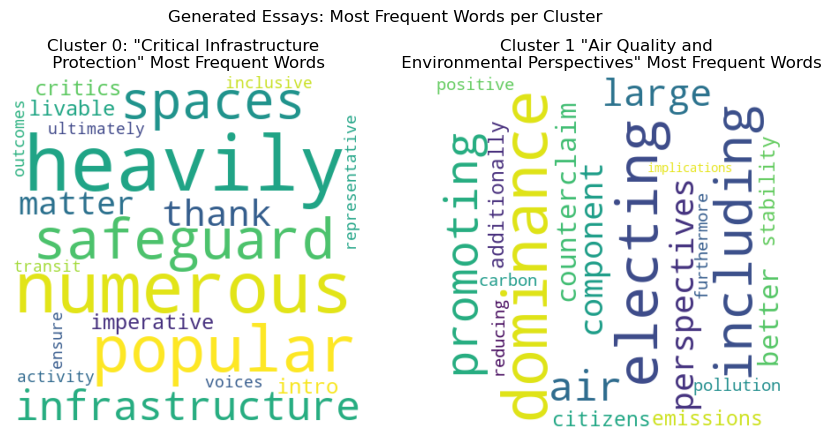

In [91]:
# Your word frequency data for the first cloud
word_frequencies_1 = {
    'heavily': 12,
    'numerous': 10,
    'popular': 8,
    'safeguard': 6,
    'spaces': 5,
    'infrastructure': 4,
    'thank': 3,
    'matter': 3,
    'imperative': 2,
    'critics': 2,
    'livable': 2,
    'intro': 2,
    'voices': 1,
    'ensure': 1,
    'ultimately': 1,
    'inclusive': 1,
    'activity': 1,
    'representative': 1,
    'outcomes': 1,
    'transit': 1,
}

# Your word frequency data for the second cloud
word_frequencies_2 = {
    'dominance': 12,
    'electing': 10,
    'including': 8,
    'promoting': 6,
    'air': 5,
    'large': 4,
    'perspectives': 3,
    'component': 3,
    'counterclaim': 2,
    'better': 2,
    'additionally': 1,
    'citizens': 1,
    'emissions': 1,
    'stability': 1,
    'pollution': 1,
    'positive': 1,
    'reducing': 1,
    'carbon': 1,
    'furthermore': 1,
    'implications': 1,
}

# Generate word clouds
wordcloud_1 = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_frequencies_1)
wordcloud_2 = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_frequencies_2)

# Plot the WordCloud images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Generated Essays: Most Frequent Words per Cluster")
axes[0].imshow(wordcloud_1, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Cluster 0: "Critical Infrastructure \n Protection" Most Frequent Words')

axes[1].imshow(wordcloud_2, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Cluster 1 "Air Quality and \n Environmental Perspectives" Most Frequent Words')

# Show the chart
plt.show()


In [92]:
after_c

,prompt_id,text,generated
0,0,Cars. Cars have been around since they became ...,0
1,0,Transportation is a large necessity in most co...,0
2,0,Americas love affair with its vehicles seems t...,0
3,0,How often do you ride in a car Do you drive a ...,0
4,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...
3049,4,Critical Infrastructure Protection\n word_coun...,1
3050,4,Critical Infrastructure Protection\n word_coun...,1
3051,4,Critical Infrastructure Protection is an imper...,1
3052,4,Critical Infrastructure Protection\n word_coun...,1


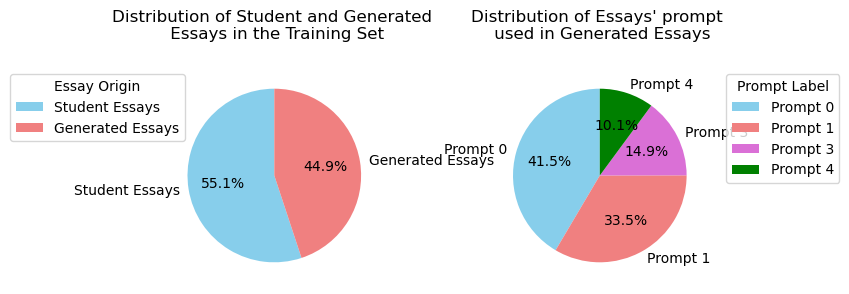

In [95]:
column1_counts = after_c['generated'].value_counts()
column2_counts = after_c[after_c['generated']==1]['prompt_id'].value_counts()

# Plot a pie chart for 'column1'
labels1 = ['Student Essays','Generated Essays']
labels2 = ['Prompt 0', 'Prompt 1','Prompt 3','Prompt 4']
sizes1 = column1_counts.values
sizes2 = column2_counts.values
fig, axs = plt.subplots(1, 2, figsize=(7, 4),gridspec_kw={'wspace': 0.5})
axs[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axs[0].set_title('Distribution of Student and Generated \n Essays in the Training Set',pad=20)
axs[0].legend(labels1, title='Essay Origin',bbox_to_anchor=(-0.75, 1), loc='upper left')

axs[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral','orchid', 'green',])
axs[1].set_title("Distribution of Essays' prompt \n used in Generated Essays",pad=20)
axs[1].legend(labels2, title='Prompt Label',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
S